In [1]:
pip install prophet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [3]:
df = pd.read_csv("C:\\Users\\govin\\Downloads\\Electric_Consumption_Cost.csv", low_memory=False)

In [4]:
df.head()

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
0,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,15396.82,GOV/NYC/068,Yes,128800,7387.97,216.0,2808.0,5200.85
1,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14556.34,GOV/NYC/068,Yes,115200,6607.87,224.0,2912.0,5036.47
2,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13904.98,GOV/NYC/068,Yes,103200,5919.55,216.0,2808.0,5177.43
3,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14764.04,GOV/NYC/068,Yes,105600,6057.22,208.0,2704.0,6002.82
4,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13729.54,GOV/NYC/068,Yes,97600,5598.34,216.0,2808.0,5323.20


In [5]:
df.describe()

,TDS #,EDP,UMIS BILL ID,# days,Current Charges,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
count,404688.000000,407031.000000,4.070310e+05,407023.000000,407031.000000,4.070310e+05,407031.000000,407031.000000,407031.000000,407031.000000
mean,117.451637,424.796384,5.823422e+06,30.439088,4218.607565,3.142596e+04,1451.373277,64.770847,923.647952,1843.586336
std,128.730128,186.589573,2.866356e+06,1.728438,6028.031431,4.927138e+04,2456.101586,656.976604,1587.398793,3627.363523
min,1.000000,63.000000,1.726303e+06,1.000000,-1207.550000,0.000000e+00,0.000000,0.000000,0.000000,-59396.430000
25%,33.000000,225.000000,3.282454e+06,29.000000,586.050000,0.000000e+00,0.000000,0.000000,0.000000,1.290000
50%,64.000000,426.000000,5.272620e+06,30.000000,2313.660000,1.400000e+04,595.940000,24.600000,301.440000,962.220000
75%,150.000000,552.000000,8.709237e+06,32.000000,5569.545000,4.640000e+04,2068.810000,91.200000,1351.480000,2749.615000
max,582.000000,999.000000,1.095711e+07,257.000000,329800.370000,1.779600e+06,195575.860000,329074.000000,78782.960000,134224.510000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407031 entries, 0 to 407030
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Development Name    405945 non-null  object 
 1   Borough             407031 non-null  object 
 2   Account Name        407031 non-null  object 
 3   Location            396406 non-null  object 
 4   Meter AMR           406845 non-null  object 
 5   Meter Scope         21492 non-null   object 
 6   TDS #               404688 non-null  float64
 7   EDP                 407031 non-null  int64  
 8   RC Code             407031 non-null  object 
 9   Funding Source      407031 non-null  object 
 10  AMP #               405145 non-null  object 
 11  Vendor Name         407031 non-null  object 
 12  UMIS BILL ID        407031 non-null  int64  
 13  Revenue Month       407031 non-null  object 
 14  Service Start Date  407023 non-null  object 
 15  Service End Date    407023 non-nul

In [7]:
df.isnull()

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407026,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
407027,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
407028,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
407029,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Development Name        1086
Borough                    0
Account Name               0
Location               10625
Meter AMR                186
Meter Scope           385539
TDS #                   2343
EDP                        0
RC Code                    0
Funding Source             0
AMP #                   1886
Vendor Name                0
UMIS BILL ID               0
Revenue Month              0
Service Start Date         8
Service End Date           8
# days                     8
Meter Number               0
Estimated                342
Current Charges            0
Rate Class                 0
Bill Analyzed              0
Consumption (KWH)          0
KWH Charges                0
Consumption (KW)           0
KW Charges                 0
Other charges              0
dtype: int64

In [9]:
df["Service End Date"] = pd.to_datetime(df["Service End Date"])

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Development Name      0
Borough               0
Account Name          0
Location              0
Meter AMR             0
Meter Scope           0
TDS #                 0
EDP                   0
RC Code               0
Funding Source        0
AMP #                 0
Vendor Name           0
UMIS BILL ID          0
Revenue Month         0
Service Start Date    0
Service End Date      0
# days                0
Meter Number          0
Estimated             0
Current Charges       0
Rate Class            0
Bill Analyzed         0
Consumption (KWH)     0
KWH Charges           0
Consumption (KW)      0
KW Charges            0
Other charges         0
dtype: int64

In [12]:
consumption_df = df.copy()

In [13]:
df.columns

Index(['Development Name', 'Borough', 'Account Name', 'Location', 'Meter AMR',
       'Meter Scope', 'TDS #', 'EDP', 'RC Code', 'Funding Source', 'AMP #',
       'Vendor Name', 'UMIS BILL ID', 'Revenue Month', 'Service Start Date',
       'Service End Date', '# days', 'Meter Number', 'Estimated',
       'Current Charges', 'Rate Class', 'Bill Analyzed', 'Consumption (KWH)',
       'KWH Charges', 'Consumption (KW)', 'KW Charges', 'Other charges'],
      dtype='object')

In [14]:
# Listing the columnns to drop from the copy of the data
drop_columns = ['Development Name', 'Borough', 'Account Name', 'Location', 'Meter AMR',
       'Meter Scope', 'TDS #', 'EDP', 'RC Code', 'Funding Source', 'AMP #',
       'Vendor Name', 'UMIS BILL ID', 'Revenue Month', 'Service Start Date',
       '# days', 'Meter Number', 'Estimated',
       'Current Charges', 'Rate Class', 'Bill Analyzed', 'Consumption (KWH)',
       'Consumption (KW)', 'KW Charges', 'Other charges']

consumption_df.drop(drop_columns, axis=1, inplace=True)

In [15]:
consumption_df.head()

,Service End Date,KWH Charges
0,2010-01-26,7387.97
1,2010-02-25,6607.87
2,2010-03-26,5919.55
3,2010-04-26,6057.22
4,2010-05-24,5598.34


In [16]:
consumption_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21049 entries, 0 to 406352
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Service End Date  21049 non-null  datetime64[ns]
 1   KWH Charges       21049 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 493.3 KB


In [17]:
consumption_df.dtypes

Service End Date    datetime64[ns]
KWH Charges                float64
dtype: object

In [18]:
consumption_df['Service End Date'] = pd.to_datetime(consumption_df['Service End Date'])

In [19]:
consumption_df

,Service End Date,KWH Charges
0,2010-01-26,7387.97
1,2010-02-25,6607.87
2,2010-03-26,5919.55
3,2010-04-26,6057.22
4,2010-05-24,5598.34
...,...,...
406348,2021-09-22,14.23
406349,2021-10-22,28.87
406350,2021-11-22,7.51
406351,2021-12-23,4.04


In [20]:
consumption_df.dtypes

Service End Date    datetime64[ns]
KWH Charges                float64
dtype: object

In [21]:
daily_Consumtion_df = consumption_df[['Service End Date', 'KWH Charges']].copy()

In [22]:
# Renaming the columns of service end date as ds and KWH Charges as y
daily_Consumption_df = consumption_df.rename(columns={'Service End Date': 'ds', 'KWH Charges': 'y'})

In [23]:
daily_Consumption_df

,ds,y
0,2010-01-26,7387.97
1,2010-02-25,6607.87
2,2010-03-26,5919.55
3,2010-04-26,6057.22
4,2010-05-24,5598.34
...,...,...
406348,2021-09-22,14.23
406349,2021-10-22,28.87
406350,2021-11-22,7.51
406351,2021-12-23,4.04


In [24]:
Monthly_Consumption_df = daily_Consumption_df.groupby(pd.PeriodIndex(daily_Consumption_df['ds'], freq='M'))['y'].mean().to_timestamp().reset_index()

In [25]:
Monthly_Consumption_df

,ds,y
0,2010-01-01,1149.970637
1,2010-02-01,1025.322372
2,2010-03-01,969.865513
3,2010-04-01,1017.619103
4,2010-05-01,978.221852
...,...,...
118,2021-09-01,1402.884888
119,2021-10-01,1325.710698
120,2021-11-01,1270.757384
121,2021-12-01,1520.093099


In [26]:
Yearly_Consumption_df = daily_Consumption_df.groupby(pd.PeriodIndex(daily_Consumption_df['ds'], freq='M'))['y'].mean().to_timestamp().reset_index()

In [27]:
Yearly_Consumption_df

,ds,y
0,2010-01-01,1149.970637
1,2010-02-01,1025.322372
2,2010-03-01,969.865513
3,2010-04-01,1017.619103
4,2010-05-01,978.221852
...,...,...
118,2021-09-01,1402.884888
119,2021-10-01,1325.710698
120,2021-11-01,1270.757384
121,2021-12-01,1520.093099


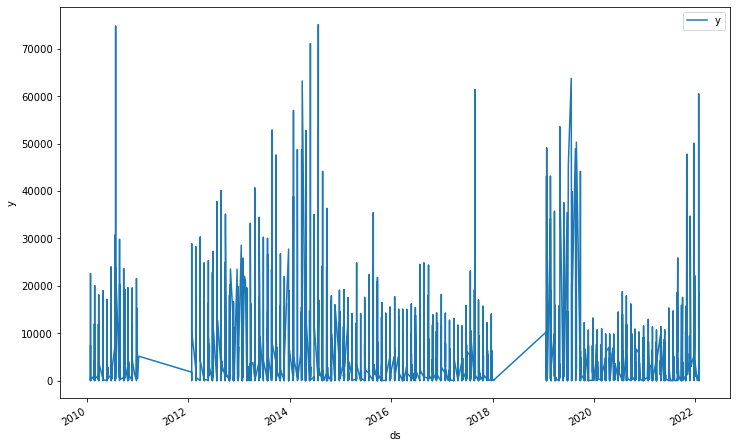

In [28]:
daily = daily_Consumption_df.set_index('ds').plot(figsize=(12, 8))
daily.set_ylabel('y')
daily.set_xlabel('ds')

plt.show()

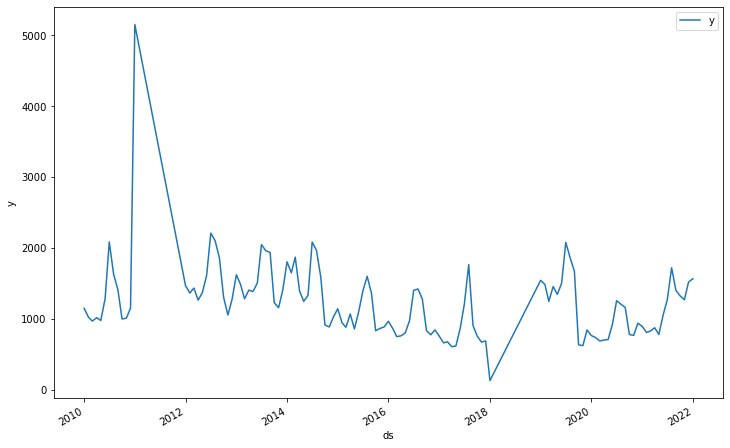

In [29]:
Monthly = Monthly_Consumption_df.set_index('ds').plot(figsize=(12, 8))
Monthly.set_ylabel('y')
Monthly.set_xlabel('ds')

plt.show()

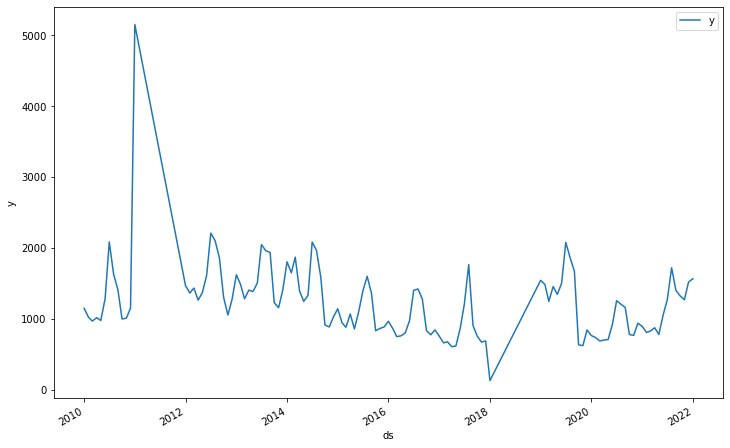

In [30]:
Yearly = Yearly_Consumption_df.set_index('ds').plot(figsize=(12, 8))
Yearly.set_ylabel('y')
Yearly.set_xlabel('ds')

plt.show()

In [31]:
def train_model(df):
    model = Prophet()
    model.fit(df)
    return model

In [32]:
def get_forecast(model, time_period, freq, growth=None):
    future_df = model.make_future_dataframe(periods=time_period, freq=freq)
    if growth == 'logistic':
        future_df['cap'] = 6000
    forecast = model.predict(future_df)
    return future_df, forecast

In [33]:
def forecast_all_plots(model, forecast):
    model.plot(forecast)
    model.plot_components(forecast)

In [34]:
daily_model = train_model(daily_Consumption_df)

22:12:45 - cmdstanpy - INFO - Chain [1] start processing
22:12:50 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
monthly_model = train_model(Monthly_Consumption_df)

22:12:52 - cmdstanpy - INFO - Chain [1] start processing
22:12:53 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
yearly_model = train_model(Yearly_Consumption_df)

22:12:53 - cmdstanpy - INFO - Chain [1] start processing
22:12:53 - cmdstanpy - INFO - Chain [1] done processing


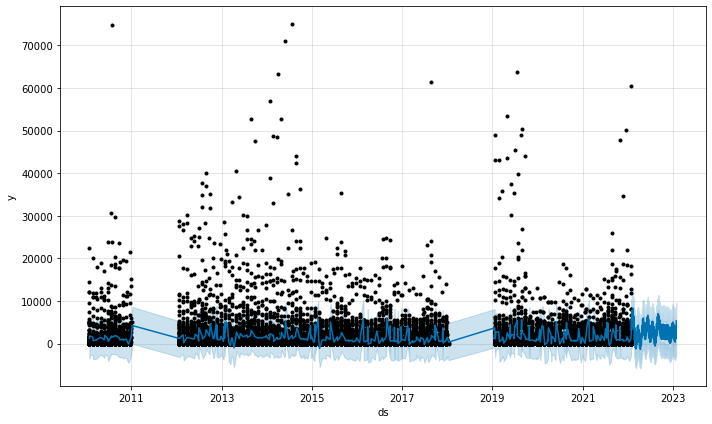

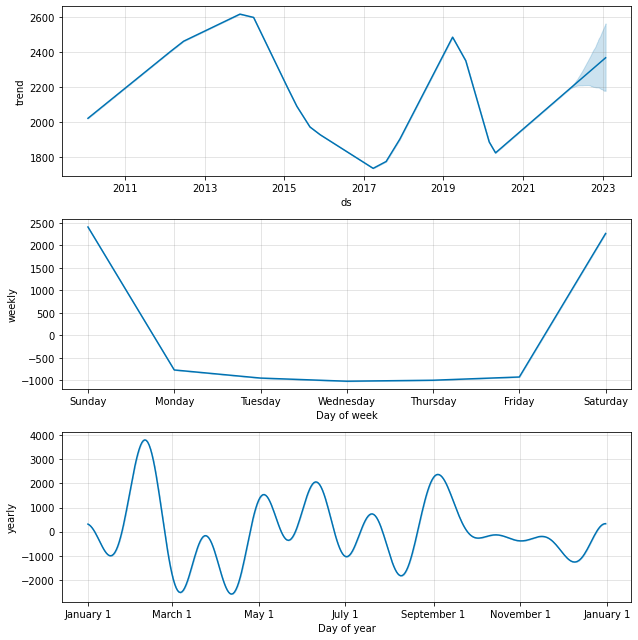

In [37]:
daily_future_df, forecast_daily = get_forecast(model=daily_model, time_period=365, freq='D')
forecast_all_plots(model=daily_model, forecast=forecast_daily)

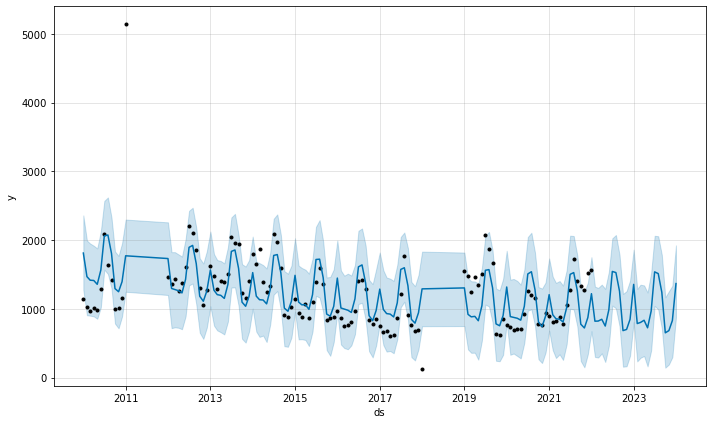

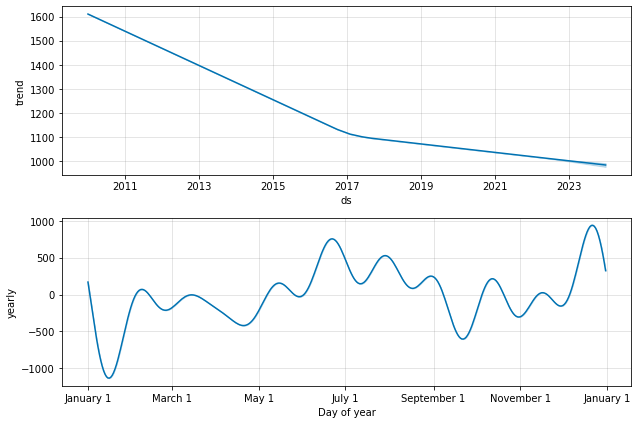

In [38]:
monthly_future_df, forecast_monthly = get_forecast(model=monthly_model, time_period=24, freq='M')
forecast_all_plots(model=monthly_model, forecast=forecast_monthly)

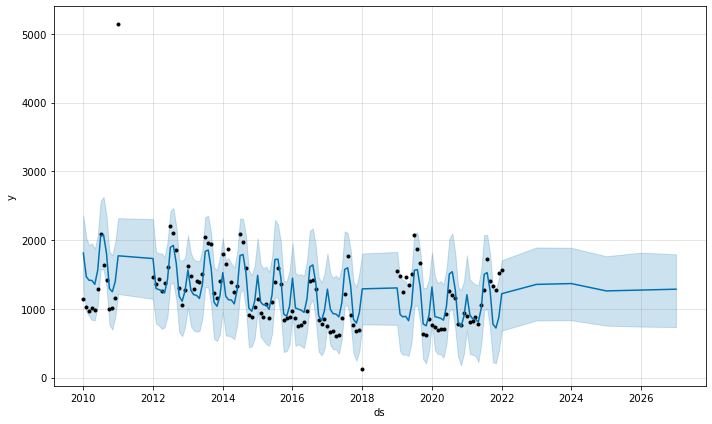

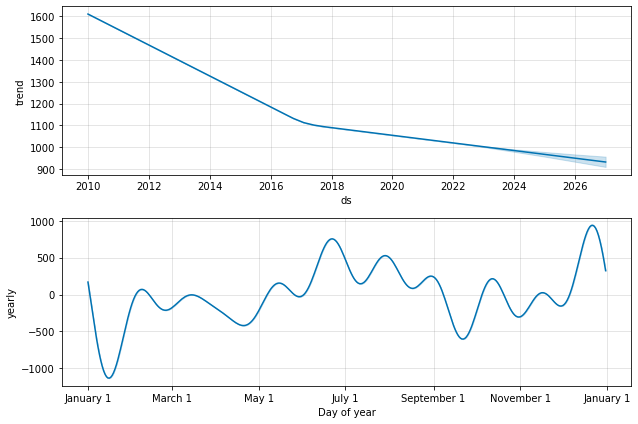

In [39]:
yearly_future_df, forecast_yearly = get_forecast(model=yearly_model, time_period=5, freq='Y')
forecast_all_plots(model=yearly_model, forecast=forecast_yearly)

In [40]:
def train_tuned_model(growth, seasonality, df):
    model = None
    
    if growth == 'logistic':
        df['cap'] = 6000
    if seasonality == 'daily':
        model = Prophet(interval_width=0.95, growth=growth, changepoint_prior_scale=1, n_changepoints=3,
                        daily_seasonality=True, weekly_seasonality=False, yearly_seasonality=False)
        model.add_seasonality('daily', period=1, fourier_order=12)
        model.fit(df)
        
    elif seasonality == 'monthly':
        model = Prophet(interval_width=0.95, growth=growth, changepoint_prior_scale=1, n_changepoints=2,
                        daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=10)
        model.add_seasonality(name='monthly', period=30.5, fourier_order=12)
        model.fit(df)
        
    elif seasonality == 'yearly':
        model = Prophet(interval_width=0.95, growth=growth, changepoint_prior_scale=1, n_changepoints=5,
                        daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=10)
        model.add_seasonality(name='yearly', period=365.25, fourier_order=100)
        model.fit(df)
        
    return model

In [41]:
def eveluate_forecast(forecast, actual, time_period):
    y_true = actual
    y_pred = forecast[:(len(forecast)-time_period)]
    
    mean_abs_error = mean_absolute_error(y_true, y_pred)
    mean_abs_prec_error = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print('Mean Absolute Error :', mean_abs_error)
    print('Mean Absolute Percentage Error :', mean_abs_prec_error)
    print('R2 Score :', r2)
    
    plt.plot(forecast, c='yellow', label='Predicted')
    plt.plot(y_true, c='green', label='Actual')
    plt.legend(loc='lower left')
    plt.show()

In [42]:
def eveluate_daily_forecast(forecast, actual):
    y_true = actual.values[-len(forecast):]
    y_pred = forecast.values
    
    mean_abs_error = mean_absolute_error(y_true, y_pred)
    mean_abs_prec_error = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print('Mean Absolute Error :', mean_abs_error)
    print('Mean Absolute Percentage Error :', mean_abs_prec_error)
    print('R2 Score :', r2)
    
    plt.plot(forecast, c='yellow', label='Predicted')
    plt.plot(y_true, c='green', label='Actual')
    plt.legend(loc='upper left')
    plt.show()

In [43]:
daily_df_test = pd.DataFrame(daily_Consumption_df[-100000:])
tuned_model_daily = train_tuned_model(growth='linear', seasonality='daily', df=daily_df_test)

22:13:15 - cmdstanpy - INFO - Chain [1] start processing
22:13:15 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
monthly_tuned_model = train_tuned_model(growth='linear', seasonality='monthly', df=Monthly_Consumption_df)

22:13:16 - cmdstanpy - INFO - Chain [1] start processing
22:13:16 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
yearly_tuned_model = train_tuned_model(growth='linear', seasonality='yearly', df=Yearly_Consumption_df)

22:13:20 - cmdstanpy - INFO - Chain [1] start processing
22:13:20 - cmdstanpy - INFO - Chain [1] done processing
22:13:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Unknown error
Optimization terminated abnormally. Falling back to Newton.
22:13:20 - cmdstanpy - INFO - Chain [1] start processing
22:13:20 - cmdstanpy - INFO - Chain [1] done processing


## Precdcting by Daily Data 
## 100 Days

Mean Absolute Error : 1276.6877162054345
Mean Absolute Percentage Error : 7.186644612517798e+17
R2 Score : -0.1474191498239925


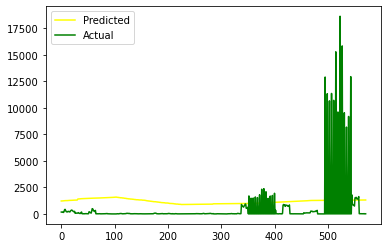

In [46]:
future_daily, forecast_daily = get_forecast(model=tuned_model_daily, time_period=100, freq='D', growth='linear')
eveluate_daily_forecast(forecast_daily['yhat'], daily_Consumption_df['y'])

Mean Absolute Error : 1238.1499290473694
Mean Absolute Percentage Error : 6.235378091647109e+17
R2 Score : -0.17318022371051356


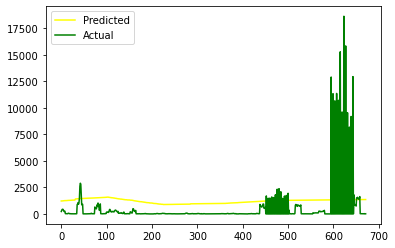

In [47]:
future_daily, forecast_daily = get_forecast(model=tuned_model_daily, time_period=200, freq='D', growth='linear')
eveluate_daily_forecast(forecast_daily['yhat'], daily_Consumption_df['y'])

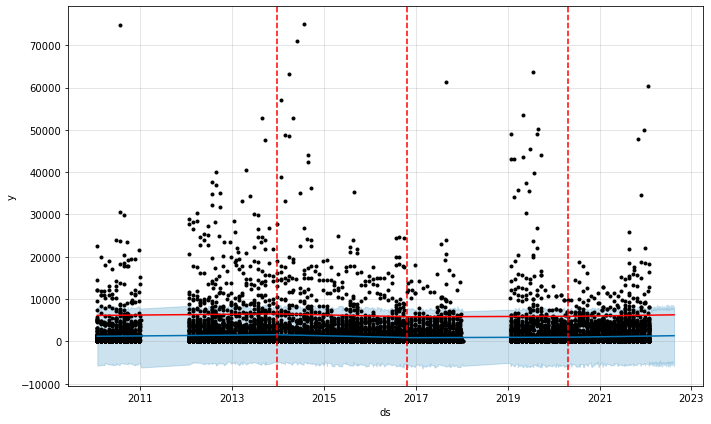

In [48]:
fig = tuned_model_daily.plot(forecast_daily, plot_cap=True)
chng_plot = add_changepoints_to_plot(fig.gca(), tuned_model_daily, forecast_daily)

## Predciting by Using Monthly Data

Mean Absolute Error : 225.05894149199685
Mean Absolute Percentage Error : 0.23032995500476575
R2 Score : 0.6054657913138939


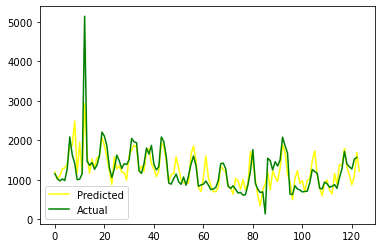

In [49]:
future_monthly, forecast_monthly = get_forecast(model=monthly_tuned_model, time_period=1, freq='M', growth='logistic')
eveluate_forecast(forecast_monthly['yhat'], Monthly_Consumption_df['y'], 1)

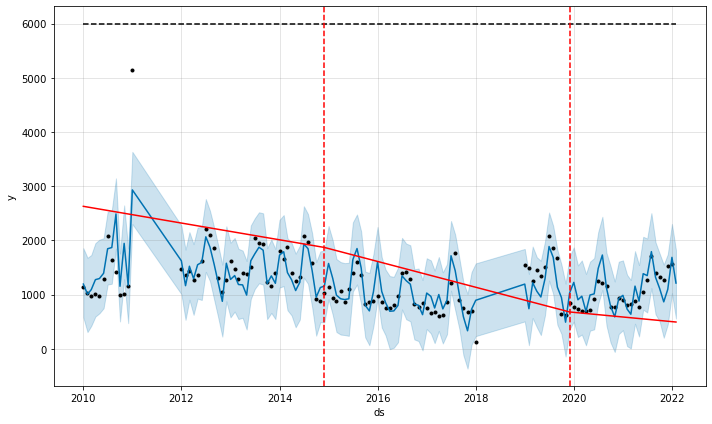

In [50]:
fig = monthly_tuned_model.plot(forecast_monthly, plot_cap=True)
chng_plot = add_changepoints_to_plot(fig.gca(), monthly_tuned_model, forecast_monthly)

Mean Absolute Error : 225.05894149199685
Mean Absolute Percentage Error : 0.23032995500476575
R2 Score : 0.6054657913138939


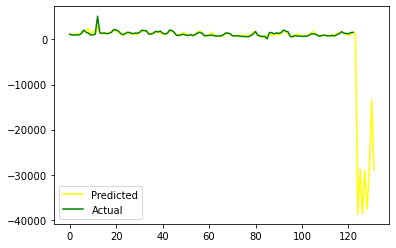

In [51]:
future_monthly, forecast_monthly = get_forecast(model=monthly_tuned_model, time_period=9, freq='M', growth='logistic')
eveluate_forecast(forecast_monthly['yhat'], Monthly_Consumption_df['y'], 9)

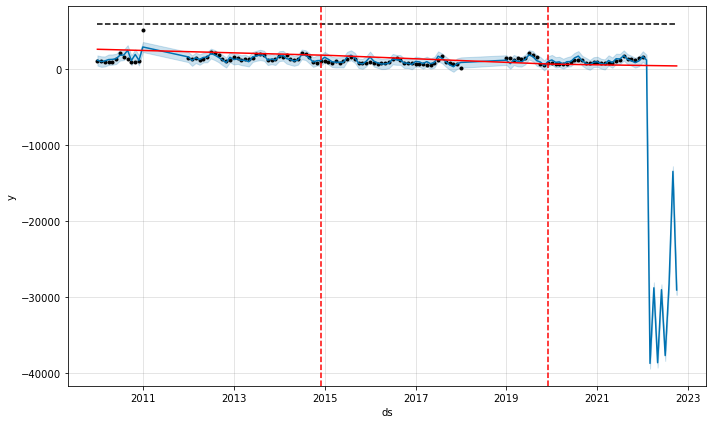

In [52]:
fig = monthly_tuned_model.plot(forecast_monthly, plot_cap=True)
chng_plot = add_changepoints_to_plot(fig.gca(), monthly_tuned_model, forecast_monthly)

## Predciting Yearly

Mean Absolute Error : 212.0182863392396
Mean Absolute Percentage Error : 0.2186919679555431
R2 Score : 0.5039997864100896


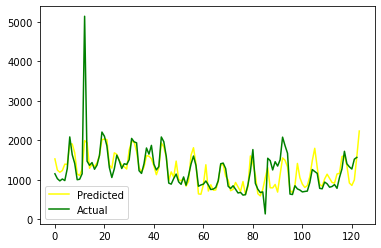

In [53]:
future_yearly, forecast_yearly = get_forecast(model=yearly_tuned_model, time_period=1, freq='Y')
eveluate_forecast(forecast_yearly['yhat'], Yearly_Consumption_df['y'], 1)

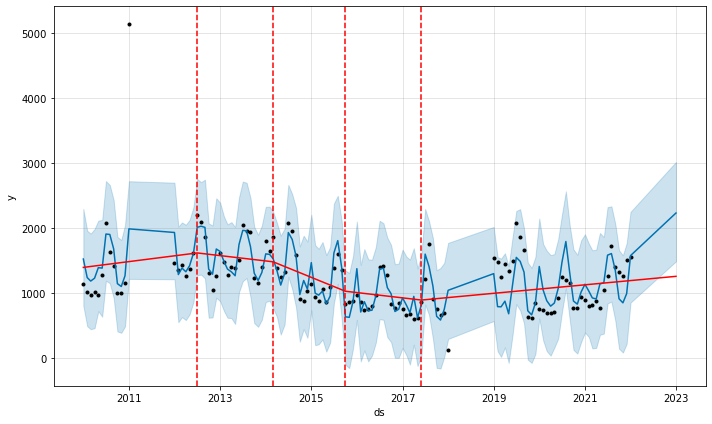

In [54]:
fig = yearly_tuned_model.plot(forecast_yearly)
chng_plot = add_changepoints_to_plot(fig.gca(), yearly_tuned_model, forecast_yearly)

Mean Absolute Error : 212.0182863392396
Mean Absolute Percentage Error : 0.2186919679555431
R2 Score : 0.5039997864100896


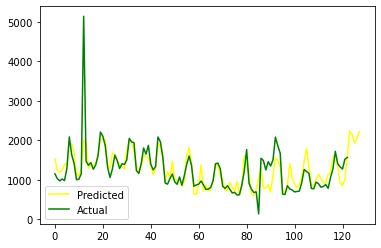

In [55]:
future_yearly, forecast_yearly = get_forecast(model=yearly_tuned_model, time_period=5, freq='Y')
eveluate_forecast(forecast_yearly['yhat'], Yearly_Consumption_df['y'], 5)

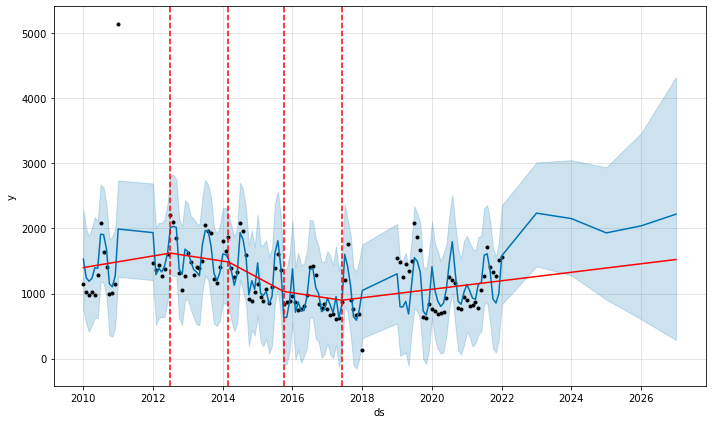

In [56]:
fig = yearly_tuned_model.plot(forecast_yearly)
chng_plot = add_changepoints_to_plot(fig.gca(), yearly_tuned_model, forecast_yearly)

In [57]:
df

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
0,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,15396.82,GOV/NYC/068,Yes,128800,7387.97,216.0,2808.0,5200.85
1,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14556.34,GOV/NYC/068,Yes,115200,6607.87,224.0,2912.0,5036.47
2,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13904.98,GOV/NYC/068,Yes,103200,5919.55,216.0,2808.0,5177.43
3,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14764.04,GOV/NYC/068,Yes,105600,6057.22,208.0,2704.0,6002.82
4,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13729.54,GOV/NYC/068,Yes,97600,5598.34,216.0,2808.0,5323.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406348,WILLIAMSBURG,BROOKLYN,WILLIAMSBURG,BLD 13,NONE,Store 22,2.0,200,K000200,FEDERAL,...,4158217,N,85.77,GOV/NYC/062,Yes,276,14.23,0.0,0.0,71.54
406349,WILLIAMSBURG,BROOKLYN,WILLIAMSBURG,BLD 13,NONE,Store 22,2.0,200,K000200,FEDERAL,...,4158217,N,176.97,GOV/NYC/062,Yes,600,28.87,0.0,0.0,148.10
406350,WILLIAMSBURG,BROOKLYN,WILLIAMSBURG,BLD 13,NONE,Store 22,2.0,200,K000200,FEDERAL,...,4158217,N,61.15,GOV/NYC/062,Yes,156,7.51,0.0,0.0,53.64
406351,WILLIAMSBURG,BROOKLYN,WILLIAMSBURG,BLD 13,NONE,Store 22,2.0,200,K000200,FEDERAL,...,4158217,N,34.10,GOV/NYC/062,Yes,84,4.04,0.0,0.0,30.06
